# Quadrotor planning w/ input rate constraint and obstacle avoidance

In [1]:
# problem definition
include("ex2_problem_data.jl")
# solver functions and variable containers
include("solver_suite.jl")

# JuMP
jump.solver!(:mosek,false);

# PIPG+ w/ restart
pipg.solver_proxy!(pipg.z,pipg.v,pipg.w,pipg.κK,pipg.κu,pipg.κx,
    pipg.rd2o_restrt,pipg.rd2K_restrt,pipg.rfval_restrt,prb.restrt_idx)

# PIPG+
pipg.reset_var!(:plus)
pipg.solver!();

# PIPGeq
pipg.solver_eq!();

# pipg.plot_solstat();

# ADMM
rival.solver_admm!();

# Chambolle & Pock (variable step)
rival.solver_cp!();

Scaling rows of H
Scaling components of g
mosek termination status: OPTIMAL
PIPG+ restarted w/ 300 relative distance to optimum: 8.370340199730528e-18
PIPG+ relative distance to optimum: 3.885072908125836e-11
PIPGeq relative distance to optimum: 7.040920524072458e-10
ADMM relative distance to optimum: 3.0520323778056445e-8
Chambolle and Pock relative distance to optimum: 1.1241939078118478e-10


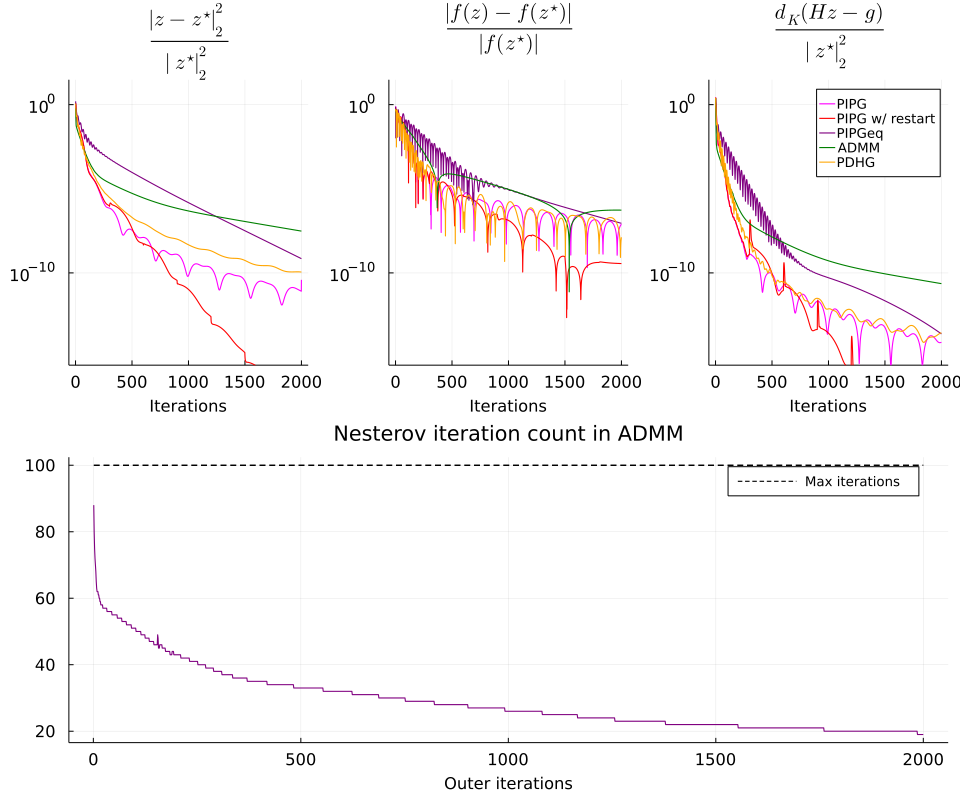

In [2]:
rival.plot_solstat();

In [3]:
x1,u1 = asm.construct_xu(pipg.z)
x2,u2 = asm.construct_xu(jump.z);

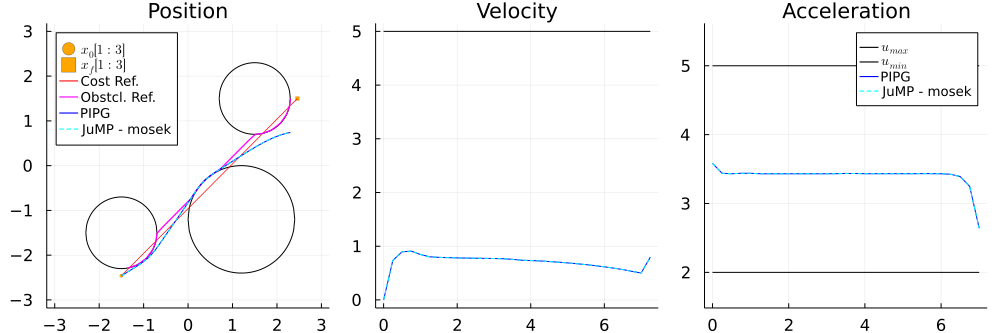

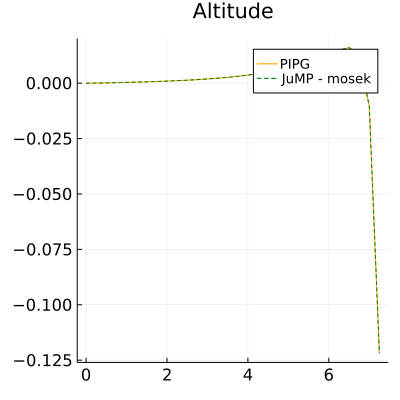

In [4]:
plotter.trajectory2D(x1,u1,x2,u2,:mosek)